# Furniture Dataset Analysis

#DATA CLEANING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
df=pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [3]:
df.shape
df.isnull().sum()
df.isnull().sum()/len(df)*100

productTitle      0.00
originalPrice    75.65
price             0.00
sold              0.00
tagText           0.15
dtype: float64

In [4]:
df.drop(columns='originalPrice',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productTitle  2000 non-null   object
 1   price         2000 non-null   object
 2   sold          2000 non-null   int64 
 3   tagText       1997 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [6]:
df['price']=df['price'].str.replace("$",'').str.replace(",",'').astype(float)
df['price'].head()
df.fillna(value='Free shipping', inplace=True)
df.isnull().sum()

productTitle    0
price           0
sold            0
tagText         0
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1906, 4)

In [9]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


In [10]:
#we will drop the producttitle because it is too messy as of now  and will predict the sold items based on the other features
df.drop(columns='productTitle',inplace=True)
df.head()

,price,sold,tagText
0,46.79,600,Free shipping
1,169.72,0,Free shipping
2,39.46,7,Free shipping
3,111.99,0,Free shipping
4,21.37,1,Free shipping


In [11]:
df['tagText'].unique()

array(['Free shipping', '+Shipping: $12.03', '+Shipping: $29.45',
       '+Shipping: $36.4', '+Shipping: $86.91', '+Shipping: $225.12',
       '+Shipping: $7.8', '+Shipping: $29.52', '+Shipping: $38.07',
       '+Shipping: $104.89', '+Shipping: $239.64', '+Shipping: $41.19',
       '+Shipping: $18.44', '+Shipping: $80.21', '+Shipping: $5.09',
       '+Shipping: $110.64', '+Shipping: $64.01', '+Shipping: $150.28',
       '+Shipping: $129.03', '+Shipping: $52.63', '+Shipping: $76.6',
       '+Shipping: $210.53', '+Shipping: $64.56', '+Shipping: $120.25',
       '+Shipping: $5.39', '+Shipping: $4.74', '+Shipping: $258.18',
       '+Shipping: $72.79', '+Shipping: $168.91', '+Shipping: $109.18',
       '+Shipping: $106.13', '+Shipping: $94.92', '+Shipping: $1,097.18',
       '+Shipping: $170.31', '+Shipping: $88.26', '+Shipping: $23.49',
       '+Shipping: $30.44', '+Shipping: $14.97', '+Shipping: $75.99',
       '+Shipping: $14.91', '+Shipping: $18.81', '+Shipping: $69.95',
       '+Shippi

In [12]:
df['Free_Shipping']=df['tagText'].str.contains('Free shipping',case=False)
df['Free_Shipping'].head()
df['Free_Shipping']=df['Free_Shipping'].astype(int)
df['Free_Shipping'].value_counts()


Free_Shipping
1    1791
0     115
Name: count, dtype: int64

In [13]:
df['Paid_Shipping'] = df['tagText'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Paid_Shipping'] = df['Paid_Shipping'].fillna(0)
df['Paid_Shipping'].isnull().sum()

np.int64(0)

In [14]:
# df=df.drop(columns='tagText',inplace=True)
df.head()



,price,sold,tagText,Free_Shipping,Paid_Shipping
0,46.79,600,Free shipping,1,0.0
1,169.72,0,Free shipping,1,0.0
2,39.46,7,Free shipping,1,0.0
3,111.99,0,Free shipping,1,0.0
4,21.37,1,Free shipping,1,0.0


In [15]:
df.drop(columns='tagText',inplace=True)

In [16]:
df.to_csv('ecommerce_furniture_dataset_cleaned.csv',index=False)

#EXPLORATORY DATA ANALYSIS 

#Projective objective to find the no of sold items based on the other features


#UNIVARIATE ANALYSIS

In [17]:
df['sold'].describe()


count     1906.000000
mean        24.449633
std        260.247848
min          0.000000
25%          1.000000
50%          3.000000
75%          9.750000
max      10000.000000
Name: sold, dtype: float64

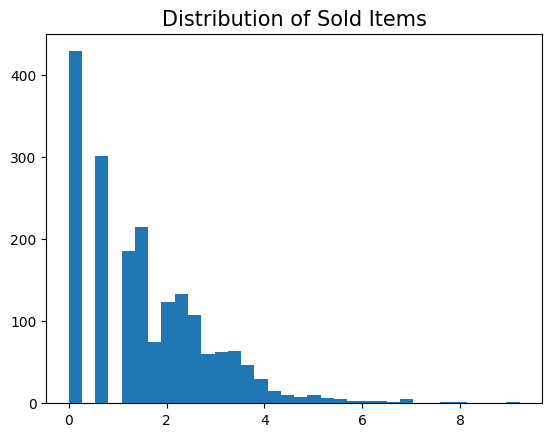

In [18]:
#we will plot histograms for no of sold items 

plt.hist(np.log1p(df['sold']),bins='fd') # Freedman–Diaconis
plt.title('Distribution of Sold Items',fontsize=15)
plt.show()


#INSIGHTS

#Most products have a low number of sold items, and small number of products have high sales.


In [19]:
df['price'].describe()


count    1906.000000
mean      154.360152
std       176.969831
min         0.990000
25%        47.465000
50%       112.480000
75%       191.542500
max      2876.380000
Name: price, dtype: float64

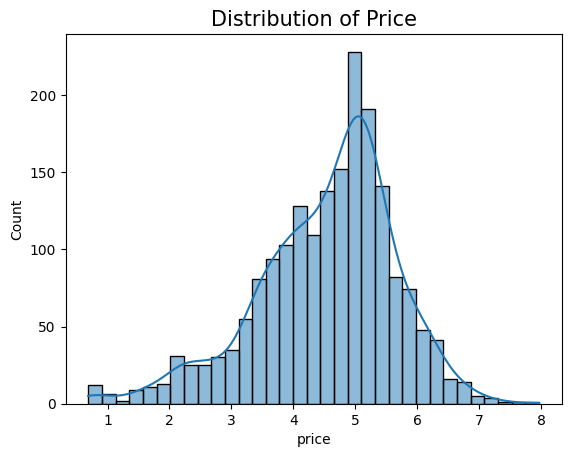

In [20]:
sns.histplot(np.log1p(df['price']), bins='fd',kde=True) # Freedman–Diaconis
plt.title('Distribution of Price', fontsize=15)
plt.show()


#Insigts


#Most products are moderately priced


#Cheap products and expensive products are very rare

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1906 non-null   float64
 1   sold           1906 non-null   int64  
 2   Free_Shipping  1906 non-null   int64  
 3   Paid_Shipping  1906 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 74.5 KB


#BIVARIATE ANALYSIS

In [22]:
df.describe()

,price,sold,Free_Shipping,Paid_Shipping
count,1906.000000,1906.000000,1906.000000,1906.000000
mean,154.360152,24.449633,0.939664,5.776280
std,176.969831,260.247848,0.238170,35.484936
min,0.990000,0.000000,0.000000,0.000000
25%,47.465000,1.000000,1.000000,0.000000
50%,112.480000,3.000000,1.000000,0.000000
75%,191.542500,9.750000,1.000000,0.000000
max,2876.380000,10000.000000,1.000000,744.640000


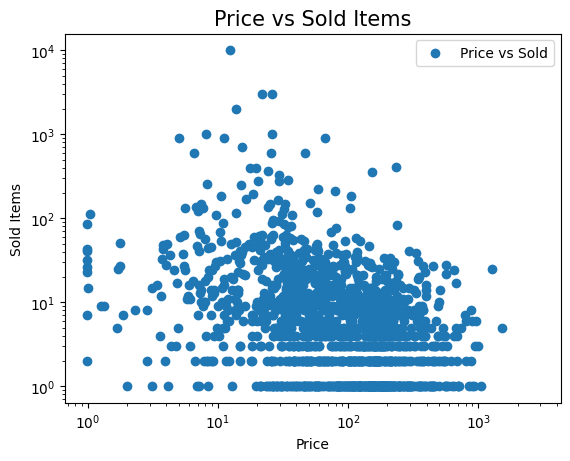

In [23]:
plt.scatter(df['price'], df['sold'],label="Price vs Sold")
plt.xscale('log')   # for price
plt.yscale('log')   # for sold 
plt.xlabel('Price')
plt.ylabel('Sold Items')
plt.title('Price vs Sold Items', fontsize=15)
plt.legend()
plt.show()

#INSIGHTS


#when price is low the number of sold items is higher


#as price increase no of sold items decreases sharply


#it is tiny negatively correlated as the price increaes the no of sold items  slightly decreases



##📊 Interpretation:


##Price and Sold_Items in your dataset are basically independent.


##Increasing or decreasing price doesn’t clearly affect the number of items sold


In [24]:
df['price'].corr(df['sold'])

np.float64(-0.05792934742150305)

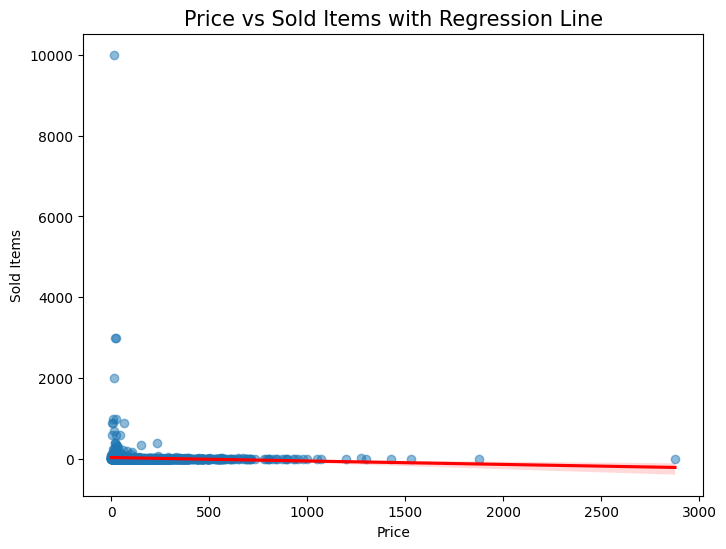

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='price', y='sold', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Price vs Sold Items with Regression Line", fontsize=15)
plt.xlabel("Price")
plt.ylabel("Sold Items")
plt.show()

#Note: 
#this is for the correlation 

C:\Users\vernon\AppData\Local\Temp\ipykernel_7504\2000382144.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([paid_sold, free_sold], labels=['Paid Shipping', 'Free Shipping'],showmeans=True)
C:\Users\vernon\AppData\Local\Temp\ipykernel_7504\2000382144.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


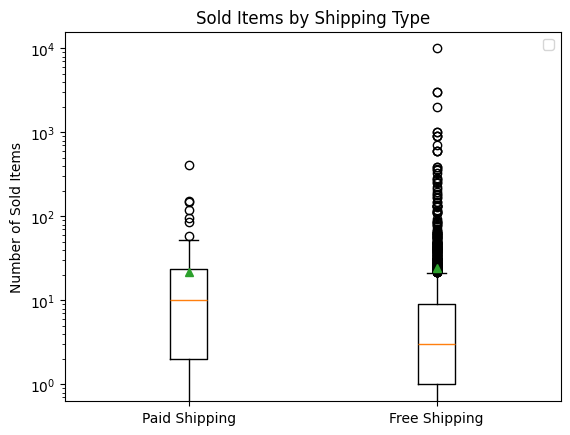

In [26]:
# Shipping vs sold items
paid_sold = df[df['Free_Shipping'] == 0]['sold']
free_sold = df[df['Free_Shipping'] == 1]['sold']

plt.boxplot([paid_sold, free_sold], labels=['Paid Shipping', 'Free Shipping'],showmeans=True)
plt.legend()
plt.yscale('log')
plt.title('Sold Items by Shipping Type')
plt.ylabel('Number of Sold Items')
plt.show()

#insights 

#1.No of items sold in free shipping is more 

#2.No of items sold in paid shipping is less

C:\Users\vernon\AppData\Local\Temp\ipykernel_7504\4245600459.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([paid_price, free_price], labels=['Paid Shipping', 'Free Shipping'],showmeans=True)
C:\Users\vernon\AppData\Local\Temp\ipykernel_7504\4245600459.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


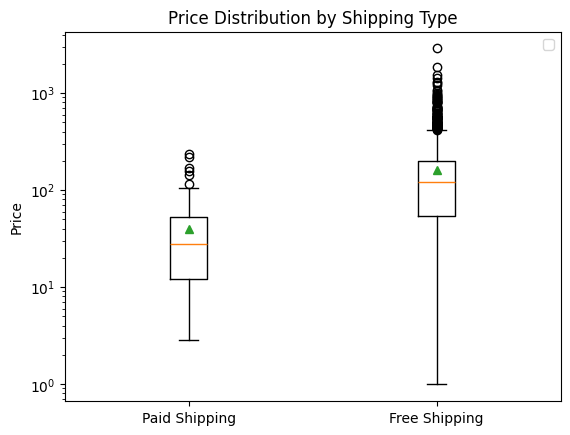

In [27]:
#shipping vs price of the products
paid_price = df[df['Free_Shipping'] == 0]['price']
free_price = df[df['Free_Shipping'] == 1]['price']

plt.boxplot([paid_price, free_price], labels=['Paid Shipping', 'Free Shipping'],showmeans=True)
plt.legend()
plt.yscale('log')
plt.title('Price Distribution by Shipping Type')
plt.ylabel('Price')
plt.show()

#insights 
# 1.Price for the free shipping products is higher than the paid shipping products
# 2.Items with Paid Shipping tend to be more consistently priced, possibly due to buyer expectations
#  or seller strategy to keep total cost competitive.


Text(0.5, 1.0, 'Paid Shipping Amount vs Sold Items')

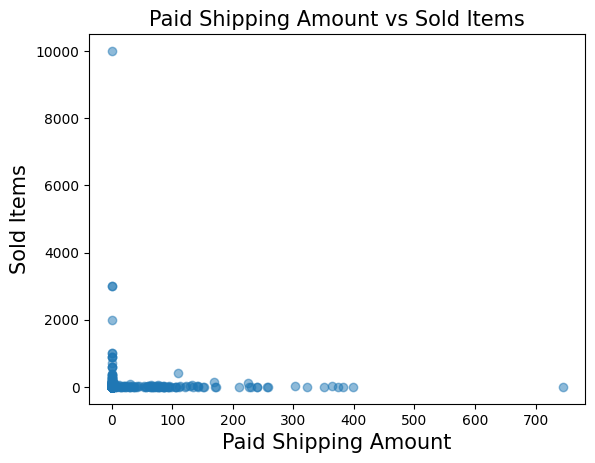

In [28]:
#paid shipping amount vs sold items
plt.scatter(df['Paid_Shipping'], df['sold'], alpha=0.5)
plt.xlabel("Paid Shipping Amount",fontsize=15)
plt.ylabel("Sold Items",fontsize=15)
plt.title("Paid Shipping Amount vs Sold Items", fontsize=15)

#INSIGHTS

#An increase in paid shipping amount no of items sold are decreasing

#outliers may be some special cases(luxury/urgent delivery) of the product 

#Higher shipping costs discourage sales, and low/free shipping strongly drives purchases.

In [29]:
df['Paid_Shipping'].value_counts()
df['Paid_Shipping'].corr(df['sold'])

#correlation is almost 0 which is wrong bcuz it only considers linear relationships and if we use spearman there
#can be ties between ranks because there are maximum zeros in the data so just using rank correlation can be misleading

np.float64(-0.003232212330163492)

#MULTIVARIATE ANALYSIS 

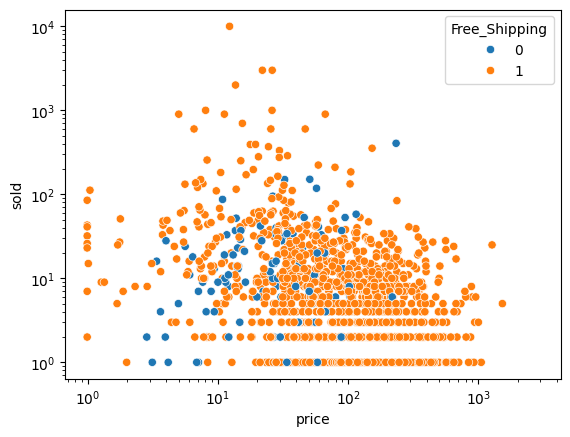

In [30]:
#price vs sold with shipping type as HUE
#1:free shipping
sns.scatterplot(x=df['price'], y=df['sold'], hue=df['Free_Shipping'], data=df)
plt.xscale('log')
plt.yscale('log')

#INSIGHTS

#for free shipping we have more sales and for the paid shipping we have less sales

In [31]:
df.describe(include='all')

,price,sold,Free_Shipping,Paid_Shipping
count,1906.000000,1906.000000,1906.000000,1906.000000
mean,154.360152,24.449633,0.939664,5.776280
std,176.969831,260.247848,0.238170,35.484936
min,0.990000,0.000000,0.000000,0.000000
25%,47.465000,1.000000,1.000000,0.000000
50%,112.480000,3.000000,1.000000,0.000000
75%,191.542500,9.750000,1.000000,0.000000
max,2876.380000,10000.000000,1.000000,744.640000


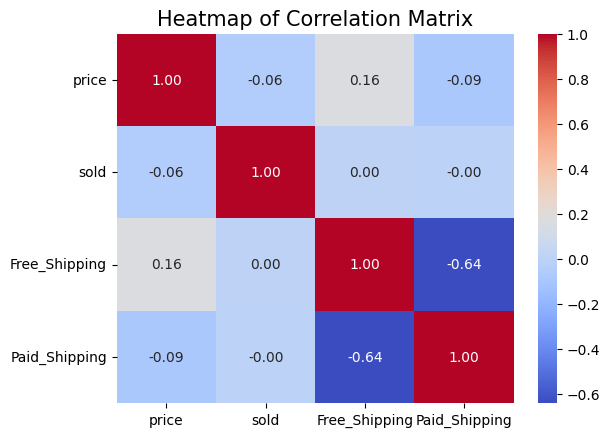

In [32]:
#HEATMAP FOR CORRELATION
corr=df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix',fontsize=15)
plt.show()

In [33]:
df.describe()

,price,sold,Free_Shipping,Paid_Shipping
count,1906.000000,1906.000000,1906.000000,1906.000000
mean,154.360152,24.449633,0.939664,5.776280
std,176.969831,260.247848,0.238170,35.484936
min,0.990000,0.000000,0.000000,0.000000
25%,47.465000,1.000000,1.000000,0.000000
50%,112.480000,3.000000,1.000000,0.000000
75%,191.542500,9.750000,1.000000,0.000000
max,2876.380000,10000.000000,1.000000,744.640000
